In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
#customer_df.head()

(9134, 24)

In [54]:
#customer_df.info()

In [55]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = map(str.lower, customer_df.columns)
#customer_df

In [56]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df[['effective_to_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   effective_to_date  9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


In [57]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [58]:
def variable_check(df):
    discrete = []
    continuous = []
    categorical = []
    pattern = '[a-z]*'
    for column in df.columns:
        if df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) > 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) > 0.05 :
            continuous.append(column)
        elif df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) < 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) < 0.05:
            discrete.append(column)
        else:
            categorical.append(column)
    return  continuous, discrete, categorical

continuous,discrete,categorical = variable_check(customer_df)

In [59]:
df_continuous = customer_df[continuous]
df_continuous.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [60]:
df_discrete = customer_df[discrete]
df_discrete.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [61]:
df_categorical = customer_df[categorical]
#df_categorical

In [62]:
print(df_categorical['state'].unique())
print(df_categorical['response'].unique())
print(df_categorical['coverage'].unique())
print(df_categorical['education'].unique())
print(df_categorical['employmentstatus'].unique())
print(df_categorical['gender'].unique())
print(df_categorical['location_code'].unique())
print(df_categorical['marital_status'].unique())
print(df_categorical['policy_type'].unique())
print(df_categorical['policy'].unique())
print(df_categorical['renew_offer_type'].unique())


['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']


In [63]:
print(df_categorical['customer'].unique())
print(df_categorical['customer'].value_counts())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64


In [64]:
#What should we do with the customer_id column? 
# I think this column don't give me any information, is more like a personal data and I think that drop is the best solution

# LAB 2 

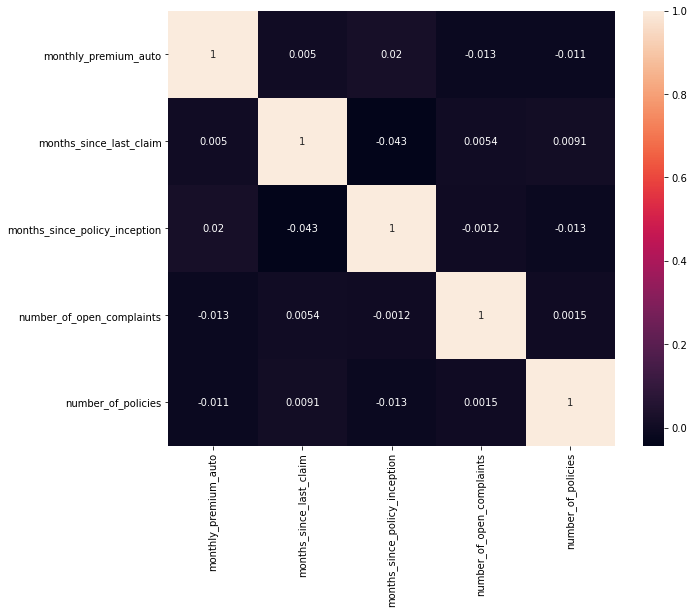

In [65]:
corr_matrix=df_discrete.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

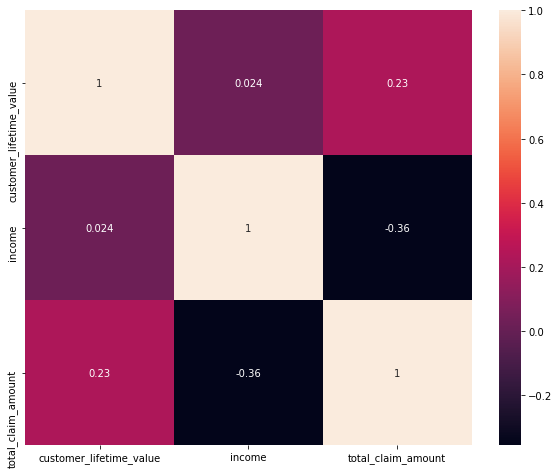

In [66]:
corr_matrix=df_continuous.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

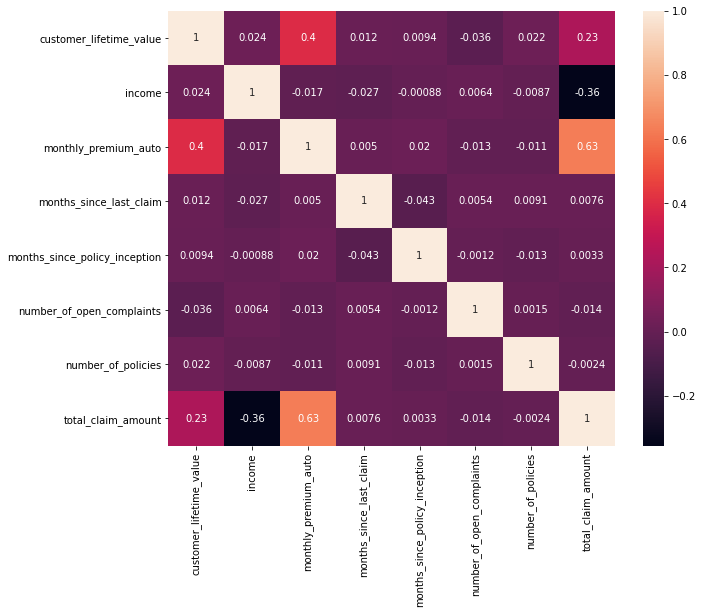

In [67]:
# looking if with all numericals make more sense the matrix, and I can see that total_claim_amount_have a correlation with monthly_premium_auto
numerical = customer_df.select_dtypes(include = np.number)
corr_matrix=numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [68]:
from enum import Enum

class Graphs(Enum):
    hist = 1
    disp = 2
    scatter = 3
    count = 4
    boxplot = 5

In [69]:
def plot(df, graph_type):
    for i in df.columns:
        plt.figure(figsize=(10,5))
        plt.title(i)
        if graph_type == Graphs.hist:
            sns.histplot(data=df[i])
        elif graph_type == Graphs.disp:
            sns.displot(data=df[i])
        elif graph_type == Graphs.scatter:
            sns.scatterplot(data=df[i])
        elif graph_type == Graphs.boxplot:
            sns.boxplot(data=df[i])
        else:
            sns.countplot(data=df[i])

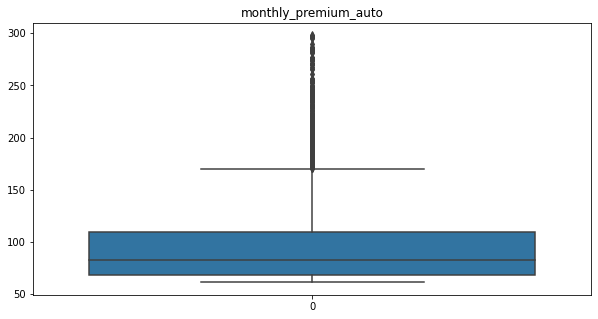

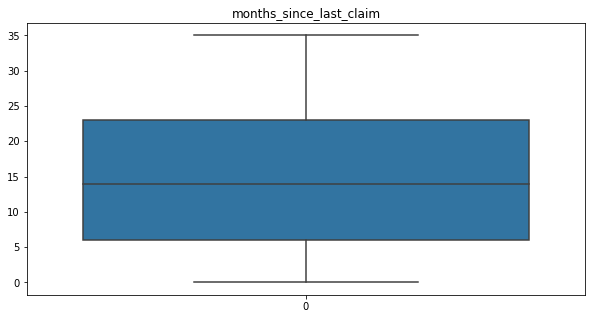

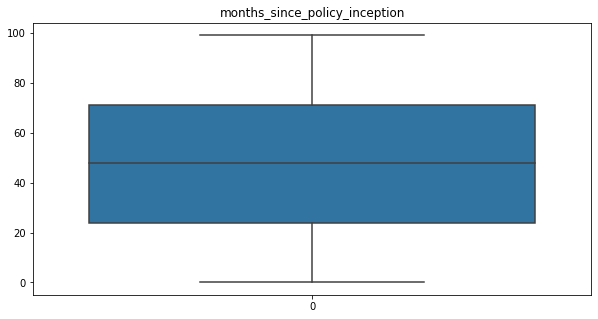

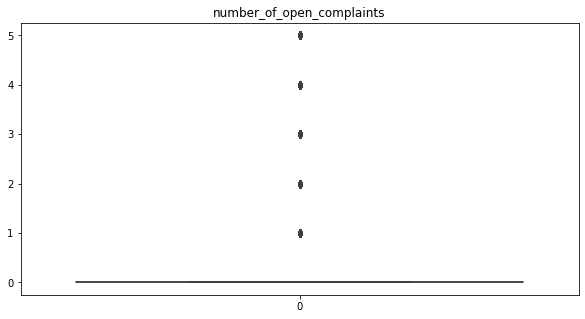

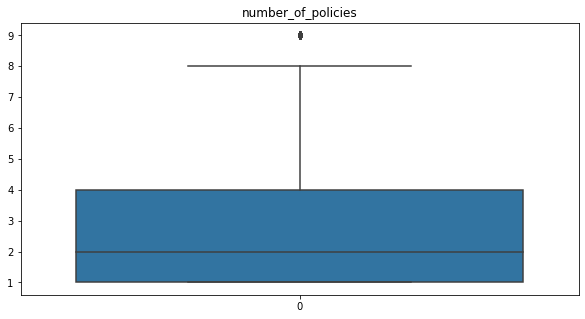

In [70]:
plot(df_discrete,Graphs.boxplot)

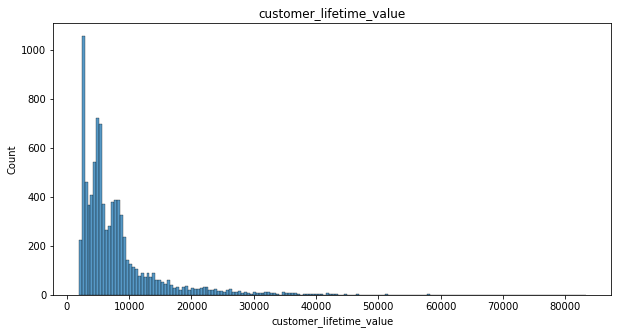

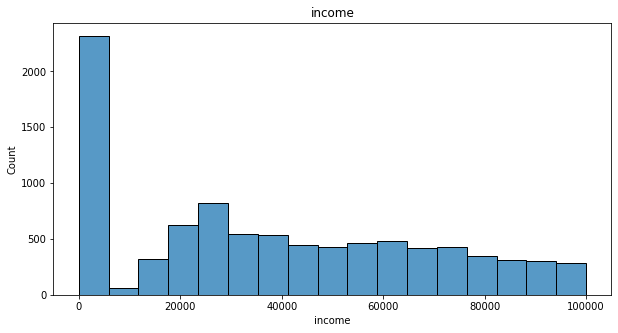

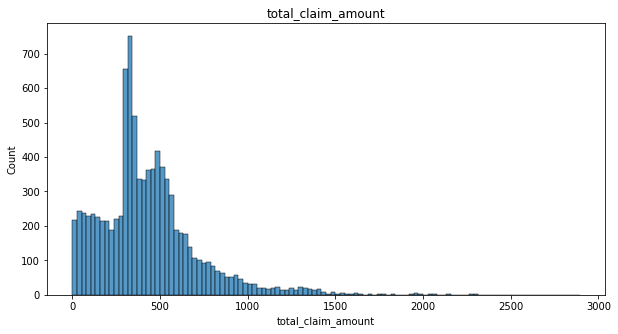

In [71]:
plot(df_continuous,Graphs.hist)

In [72]:
# Have you found outliers? If you have, what should we do with them?

#Because we don't have missing values, replace then with ML, doesn't make sense, so we can scale or use som log transformation. I will try somo bellow.

In [73]:
# def log_transfom_clean(x):
#     if np.isfinite(x):
#         return np.log(x)
#     else:
#         return np.NAN # We are returning NaNs so that we can replace them later
    
# pd.Series(df_continuous['total_claim_amount'].apply(log_transfom_clean)).hist()
# plt.show()

#don't give me a real difference

In [74]:
iqr = np.percentile(df_continuous['total_claim_amount'],75) - np.percentile(df_continuous['total_claim_amount'],25)
upper_limit = np.percentile(df_continuous['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = df_continuous[df_continuous['total_claim_amount'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

960.3997301249999


453

<AxesSubplot:>

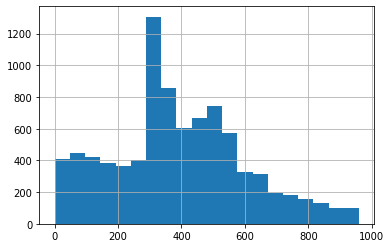

In [75]:
data = df_continuous[df_continuous['total_claim_amount'] < upper_limit]
data['total_claim_amount'].hist(bins=20)

#removing the outiliers with iqr make more sense to me

In [76]:
# I can create a classification too, to compare with other datas

tca_labels = ['Low', 'Moderate', 'High', 'Very High']
df_continuous['tca_labels']  = pd.qcut(df_continuous['total_claim_amount'] ,4,labels=tca_labels)
df_continuous[['total_claim_amount', 'tca_labels']].head(10)

<ipython-input-76-f8fd08413e36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous['tca_labels']  = pd.qcut(df_continuous['total_claim_amount'] ,4,labels=tca_labels)


,total_claim_amount,tca_labels
0,384.811147,High
1,1131.464935,Very High
2,566.472247,Very High
3,529.881344,High
4,138.130879,Low
5,159.383042,Low
6,321.600000,Moderate
7,363.029680,Moderate
8,511.200000,High
9,425.527834,High


In [77]:
df_continuous['tca_labels'].value_counts()

Low          2284
Very High    2284
Moderate     2283
High         2283
Name: tca_labels, dtype: int64

21997.030236375


<AxesSubplot:>

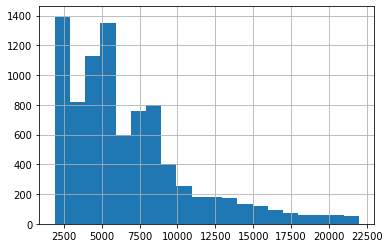

In [78]:
# testing with customer_lifetime_value remove the outliers

iqr = np.percentile(df_continuous['customer_lifetime_value'],75) - np.percentile(df_continuous['total_claim_amount'],25)
upper_limit = np.percentile(df_continuous['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = df_continuous[df_continuous['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed


data = df_continuous[df_continuous['customer_lifetime_value'] < upper_limit]
data['customer_lifetime_value'].hist(bins=20)

In [79]:
cvl_labels = ['Low', 'Moderate', 'High', 'Very High']
df_continuous['cvl_labels']  = pd.qcut(df_continuous['customer_lifetime_value'] ,4,labels=cvl_labels)
df_continuous[['customer_lifetime_value', 'tca_labels']].head(10)

<ipython-input-79-320437f65c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous['cvl_labels']  = pd.qcut(df_continuous['customer_lifetime_value'] ,4,labels=cvl_labels)


,customer_lifetime_value,tca_labels
0,2763.519279,High
1,6979.535903,Very High
2,12887.431650,Very High
3,7645.861827,High
4,2813.692575,Low
5,8256.297800,Low
6,5380.898636,Moderate
7,7216.100311,Moderate
8,24127.504020,High
9,7388.178085,High


In [80]:
# I understood is that the last itens on the lab aksing

# LAB 3

In [81]:
df_categorical = customer_df.select_dtypes(object)
df_categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


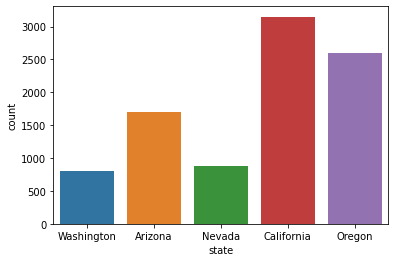

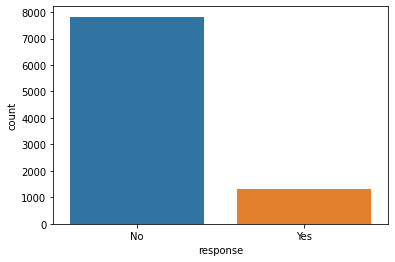

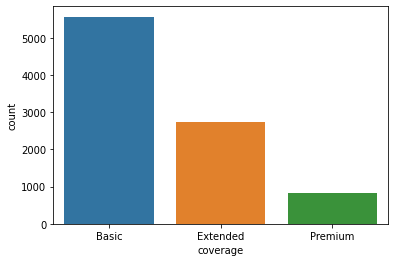

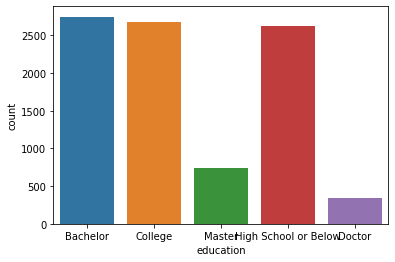

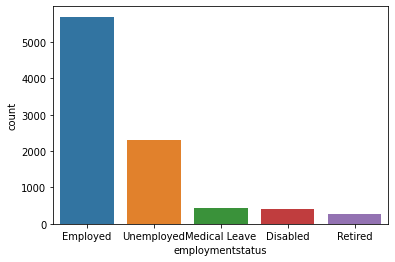

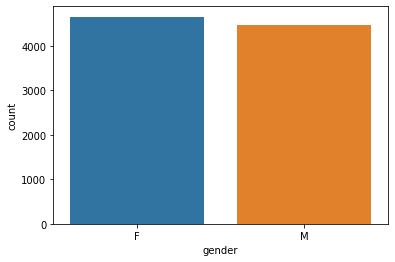

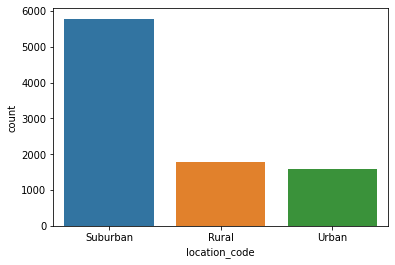

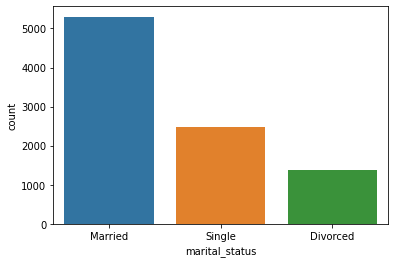

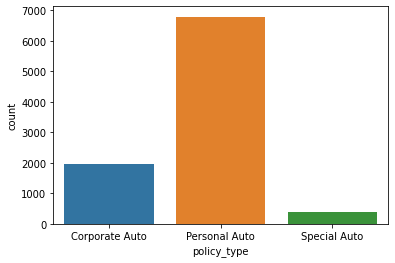

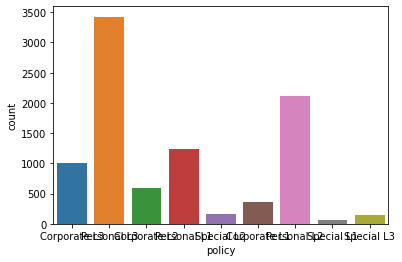

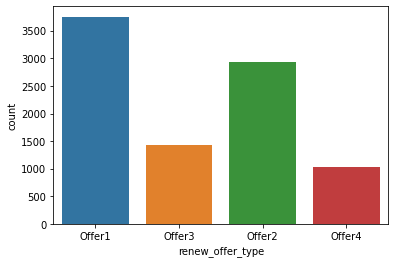

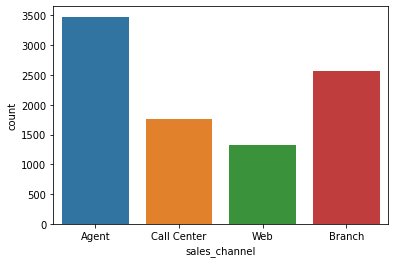

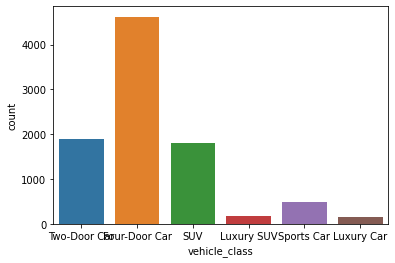

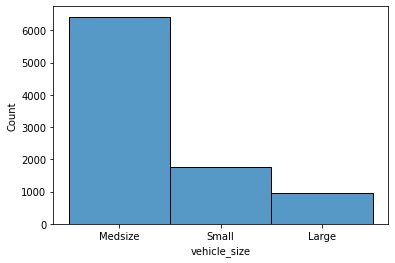

In [82]:
sns.countplot(x="state", data=df_categorical)
plt.show()
sns.countplot(x="response", data=df_categorical)
plt.show()
sns.countplot(x="coverage", data=df_categorical)
plt.show()
sns.countplot(x="education", data=df_categorical)
plt.show()
sns.countplot(x="employmentstatus", data=df_categorical)
plt.show()
sns.countplot(x="gender", data=df_categorical)
plt.show()
sns.countplot(x="location_code", data=df_categorical)
plt.show()
sns.countplot(x="marital_status", data=df_categorical)
plt.show()
sns.countplot(x="policy_type", data=df_categorical)
plt.show()
sns.countplot(x="policy", data=df_categorical)
plt.show()
sns.countplot(x="renew_offer_type", data=df_categorical)
plt.show()
sns.countplot(x="sales_channel", data=df_categorical)
plt.show()
sns.countplot(x="vehicle_class", data=df_categorical)
plt.show()
sns.histplot(x="vehicle_size", data=df_categorical)
plt.show()

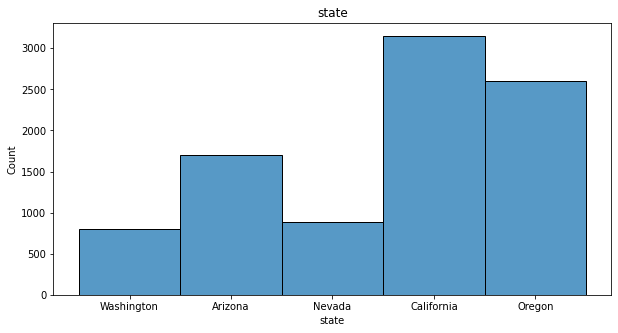

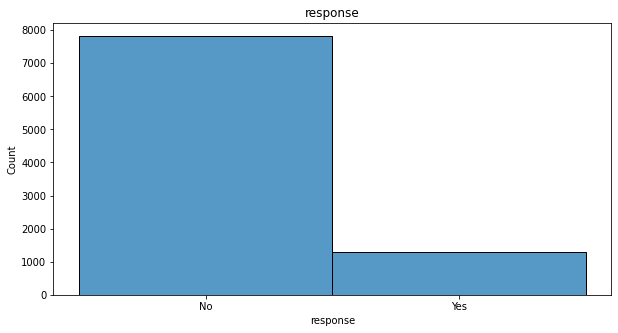

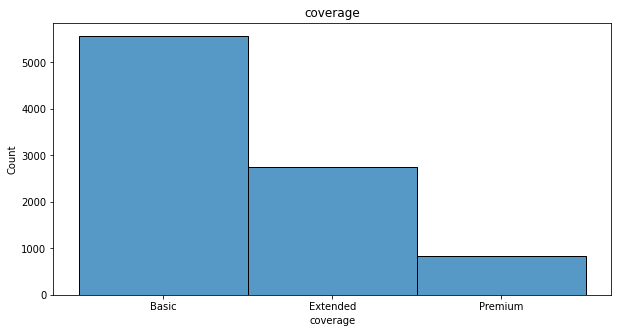

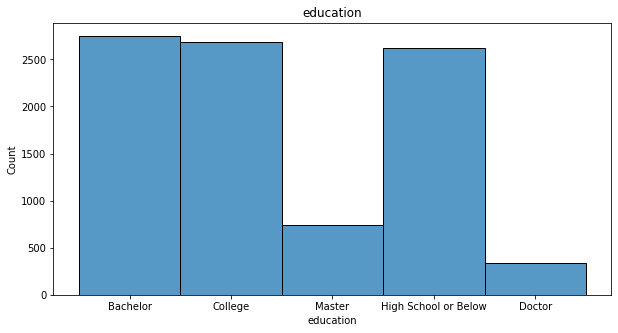

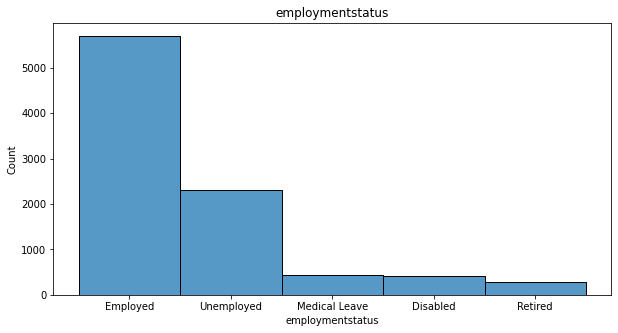

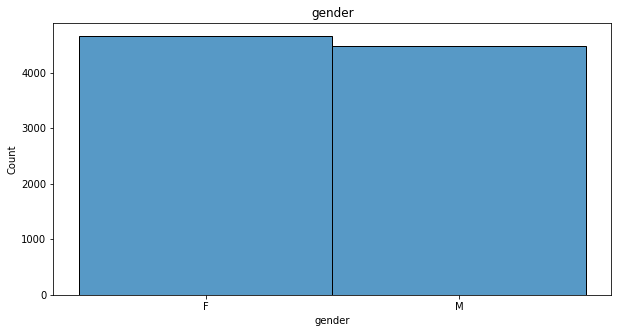

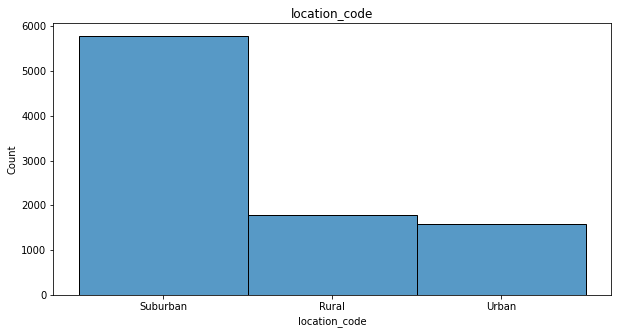

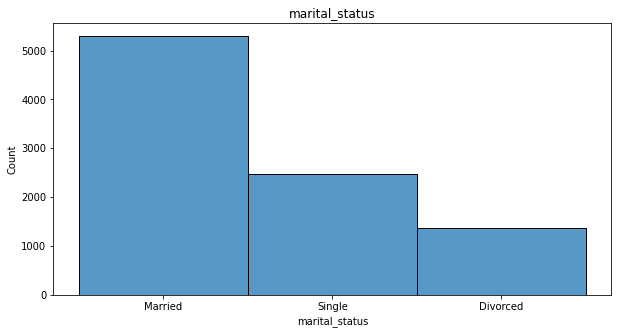

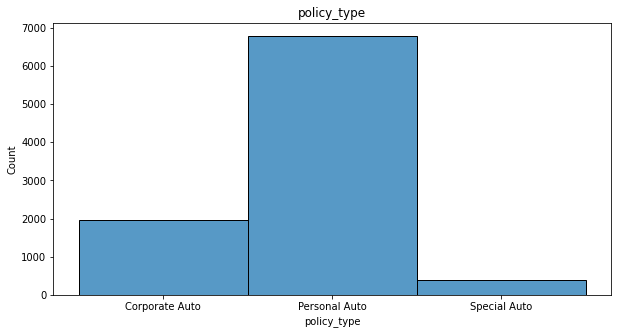

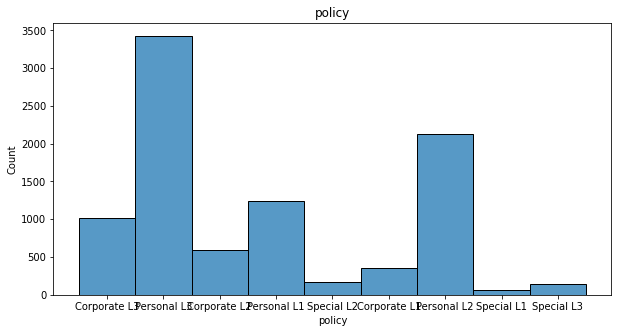

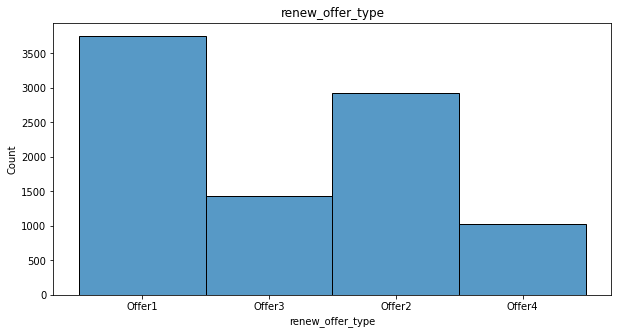

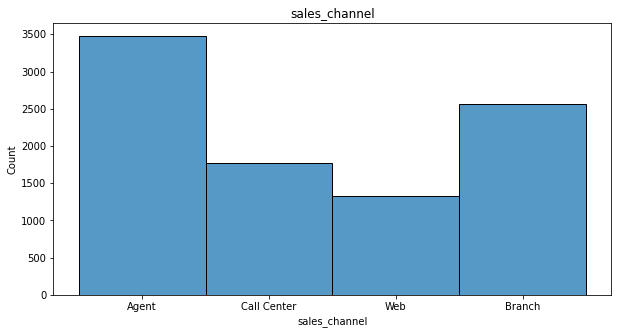

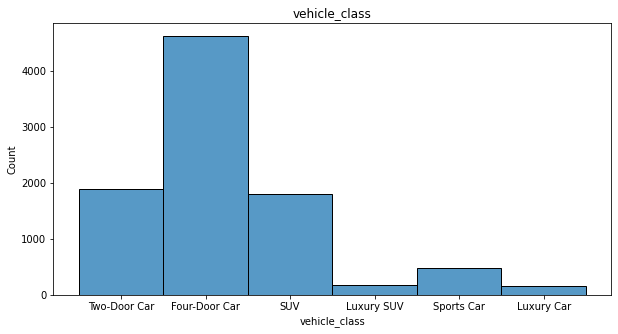

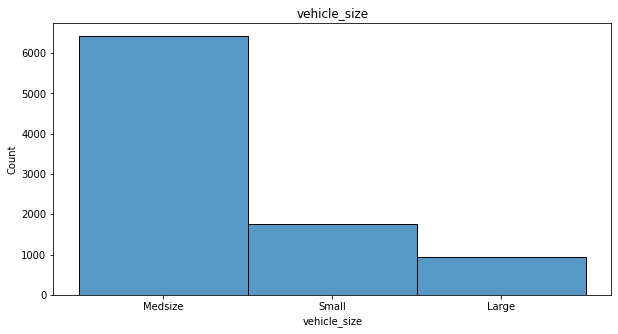

In [83]:
df_categorical = df_categorical.drop("customer", axis=1)
plot(df_categorical,Graphs.hist)

In [84]:
# I can really work on the categoricals, first drop the Customer, then I can aggregate Vehicle class, 
# in Two-door, Four door, Luxury, Sport
# I will drop policy_tyoe, I think is not necessary in this point 
# we can aggregate education too in Master/Doctor together, and bachelor/college
# we can enconding some of the categoricals too


In [85]:
customer_df["effective_to_date"].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

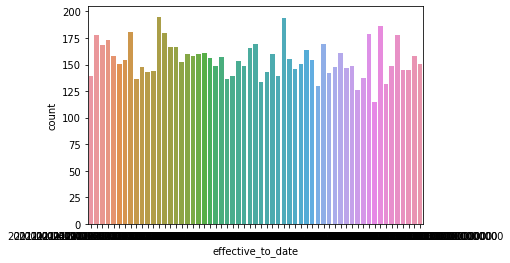

<Figure size 720x360 with 0 Axes>

In [86]:
sns.countplot(x="effective_to_date", data=customer_df)
plt.figure(figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='effective_to_date', ylabel='number_of_policies'>

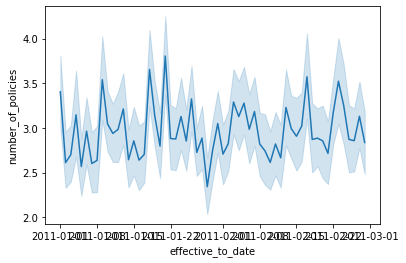

In [87]:
sns.lineplot(x="effective_to_date", y="number_of_policies", data=customer_df)

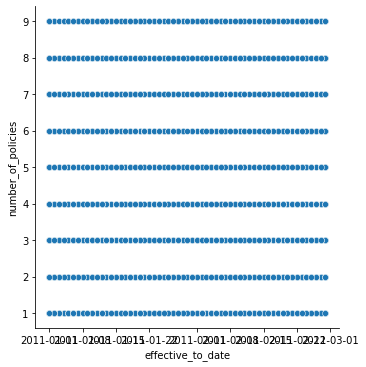

In [88]:
sns.relplot(x="effective_to_date", y="number_of_policies", data=customer_df) 

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

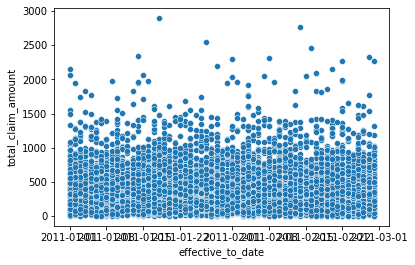

In [89]:
sns.scatterplot(x="effective_to_date", y="total_claim_amount", data=customer_df) 

In [90]:
#ploting the date series, is very hard to work with so many entries, so I think it be usefull to work with months and day of week in here.

# LAB 4

In [91]:
iqr = np.percentile(customer_df['total_claim_amount'],75) - np.percentile(customer_df['total_claim_amount'],25)
upper_limit = np.percentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['total_claim_amount'] > upper_limit]
print(len(extraordinary_points)) # THis checks the number of points that will be removed

customer_df_outliers_tca = customer_df[customer_df['total_claim_amount'] < upper_limit]


960.3997301249999
453


In [92]:
iqr = np.percentile(customer_df_outliers_tca['customer_lifetime_value'],75) - np.percentile(customer_df_outliers_tca['customer_lifetime_value'],25)
upper_limit1 = np.percentile(customer_df_outliers_tca['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit1)

extraordinary_points = customer_df_outliers_tca[customer_df_outliers_tca['customer_lifetime_value'] > upper_limit1]
len(extraordinary_points)  # THis checks the number of points that will be removed

customer_df_outliers = customer_df_outliers_tca[customer_df_outliers_tca['customer_lifetime_value'] < upper_limit1]

15901.8188285


<AxesSubplot:>

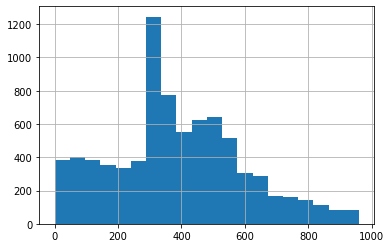

In [93]:
customer_df_outliers.shape
customer_df_outliers['total_claim_amount'].hist(bins=20)

In [94]:
iqr = np.percentile(customer_df_outliers['monthly_premium_auto'],75) - np.percentile(customer_df_outliers['monthly_premium_auto'],25)
upper_limit2 = np.percentile(customer_df_outliers['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit2)

extraordinary_points = customer_df_outliers[customer_df_outliers['monthly_premium_auto'] > upper_limit2]
len(extraordinary_points)  # THis checks the number of points that will be removed

customer_df_outliers = customer_df_outliers[customer_df_outliers['monthly_premium_auto'] < upper_limit2]

160.5


<AxesSubplot:>

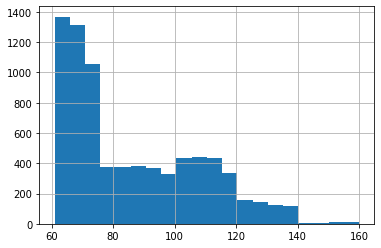

In [95]:
customer_df_outliers.shape
customer_df_outliers['monthly_premium_auto'].hist(bins=20)

In [45]:
customer_df_outliers.shape

(7792, 24)

In [96]:
discrete = customer_df_outliers[discrete]
discrete.shape

(7792, 5)

In [97]:
continuous = customer_df_outliers[continuous]
continuous.shape

(7792, 3)

In [98]:
# normalize the continous variables

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

continuous_normalized = pd.DataFrame(MinMaxScaler().fit_transform(continuous), columns=continuous.columns)
continuous_normalized

,customer_lifetime_value,income,total_claim_amount
0,0.061968,0.562847,0.400735
1,0.786805,0.487763,0.589962
2,0.411526,0.000000,0.551847
3,0.065560,0.438443,0.143781
4,0.455231,0.629140,0.165918
...,...,...,...
7787,0.157684,0.477701,0.563723
7788,0.085809,0.216081,0.394890
7789,0.448615,0.000000,0.823617
7790,0.402833,0.219452,0.719885


# Encode the categorical variables

In [99]:
categorical = customer_df_outliers.select_dtypes(object)

In [100]:
def clean_vehicle_class(x):
    if x == 'Four-Door Car':
        return 'Four-Door Car'
    elif x == 'Two-Door Car':
        return 'Two-Door Car'
    elif x == 'SUV':
        return 'SUV'
    elif x == 'Sports Car':
        return 'Sports Car'
    elif x == 'Luxury SUV':
        return 'Luxury'
    else:
        return 'Luxury'

categorical["vehicle_class"] = categorical["vehicle_class"].apply(clean_vehicle_class)

<ipython-input-100-aa312cbd1ca6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical["vehicle_class"] = categorical["vehicle_class"].apply(clean_vehicle_class)


In [177]:
# categorical["coverage"] = categorical["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

# categorical["employmentstatus"] = categorical["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})

# categorical["location_code"] = categorical["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

# categorical["vehicle_size"] = categorical["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [102]:
categorical.dtypes
num = categorical.select_dtypes(np.number)
cat = categorical.select_dtypes(object)
cat = cat.drop("customer", axis=1)
cat.dtypes

state               object
response            object
education           object
gender              object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
dtype: object

In [103]:
cat_enconder = pd.get_dummies(cat,drop_first=True)
cat_enconder

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9130,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9131,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9132,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [104]:
#transforming the date

customer_df_outliers['month'] = customer_df_outliers['effective_to_date'].dt.month
customer_df_outliers['dayofweek'] = customer_df_outliers['effective_to_date'].dt.dayofweek
customer_date = customer_df_outliers[['month', 'dayofweek']]
customer_date

,month,dayofweek
0,2,3
2,2,5
3,1,3
4,2,3
5,1,1
...,...,...
9128,1,3
9130,2,5
9131,2,6
9132,2,3


In [108]:
continuous_normalized = continuous_normalized.reset_index()
discrete = discrete.reset_index()
num = num.reset_index()
customer_date  = customer_date.reset_index()
cat_enconder  = cat_enconder.reset_index()

In [127]:
customer = pd.concat([continuous_normalized, discrete, num, customer_date, cat_enconder], axis=1)
customer = customer.drop("index", axis=1)
#customer = customer.drop("level_0", axis=1)
customer

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.061968,0.562847,0.400735,69,32,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.786805,0.487763,0.589962,108,18,38,0,2,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0.411526,0.000000,0.551847,106,18,65,0,7,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.065560,0.438443,0.143781,73,12,44,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.455231,0.629140,0.165918,69,14,94,0,2,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,0.157684,0.477701,0.563723,104,16,58,0,1,2,0,...,0,0,0,0,1,0,0,0,0,0
7788,0.085809,0.216081,0.394890,79,14,28,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7789,0.448615,0.000000,0.823617,85,9,37,3,2,1,1,...,0,0,0,0,1,0,0,0,0,0
7790,0.402833,0.219452,0.719885,96,34,3,0,3,1,0,...,0,0,1,0,1,0,0,0,0,0


# Lab | Comparing regression models

In [142]:
X = customer.drop(['total_claim_amount'],axis=1)
y = customer['total_claim_amount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [143]:
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

score = LR.score(X_test, y_test)
score

0.5134925702237798

In [144]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)

score = KNN.score(X_test, y_test)
score

0.15554694510961709

In [145]:
scores = []
for k in range(4,20):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [146]:
scores

[0.12722189358403435,
 0.15554694510961709,
 0.17436559948991415,
 0.18691587856312675,
 0.19225264459855618,
 0.19012552100672186,
 0.1928333116138412,
 0.19898160336020132,
 0.20150603977170112,
 0.20214300870612079,
 0.2015013880334755,
 0.2032470787766293,
 0.2054854469051569,
 0.20602634369697637,
 0.20704151642384805,
 0.2061195129559148]

Text(0, 0.5, 'Accuracy')

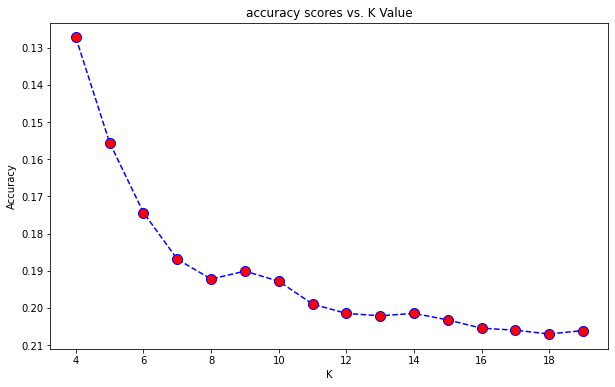

In [147]:
plt.figure(figsize=(10,6))
plt.plot(range(4,20),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [148]:
uniform_model = KNeighborsRegressor(n_neighbors=6)
uniform_model.fit(X_train, y_train)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.17436559948991415

In [149]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076595

In [ ]:
#Using the raw data and make a different cleaning I have better results

In [163]:
#customer_df = customer_df.drop("customer", axis =1)
X = customer_df.drop(['total_claim_amount'],axis=1)
y = customer_df['total_claim_amount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)


numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [164]:
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
score = LR.score(X_test, y_test)
score

0.7695027443638532

In [165]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

score = KNN.score(X_test, y_test)
score

0.5989346943476974

In [166]:
scores = []
for k in range(2,15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

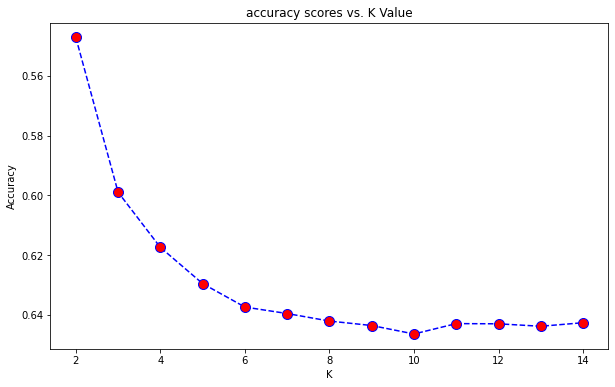

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [168]:
uniform_model = KNeighborsRegressor(n_neighbors=6)
uniform_model.fit(X_train, y_train)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.6373688462393551

In [176]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(X, y, s=1, c='b', marker="s", label='real')
#ax1.scatter(X_test, y_test, s=10, c='r', marker="o", label='NN Prediction')
#plt.show()

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076595